In [1]:
import networkx as nx
import DynaNet
from Equations import FisherKPPStep as KPP
import numpy as np
from matplotlib import pyplot as plt

# Set exponent of graph size
N = 8

# Note here that 0 is our Root node and will follow special dynamics
G = nx.full_rary_tree(3, 3**N-1)

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 3.2
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

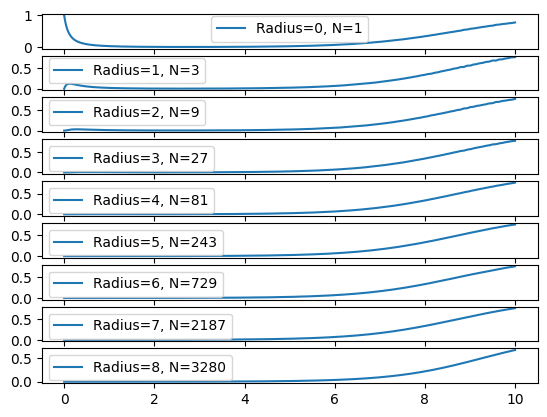

In [2]:
# compute shortest path lengths from our tension source node
spl = nx.shortest_path_length(G, source=0)
spl = np.array([spl[k] for k in range(3**N-1)])

# set up for plotting
fig, axs = plt.subplots(len(set(spl)), 1)

# Iterate through unique radii
for ii in set(spl):
    # mask on radii and sum for total load at radius ii
    loads = np.dot(np.transpose(res.y), spl==ii)/sum(spl==ii)
    axs[ii].plot(res.t, loads, label=f'Radius={ii}, N={sum(spl==ii)}')

    # Plot legends
    axs[ii].legend()

{0, 1, 2, 3, 4, 5, 6, 7, 8}
0
1
4
13
40
121
364
1093
3280


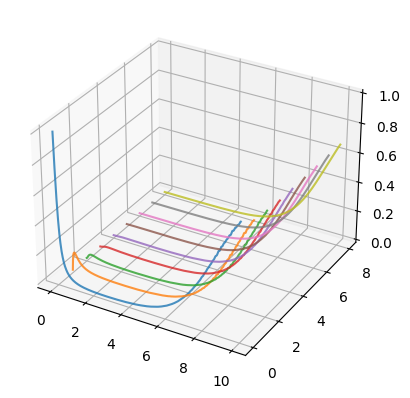

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
y_ticks = list(range(3**N-1))
print(set(spl))
for ii in set(spl):
    jj = np.argwhere(spl==ii)[0][0]
    print(jj)
    ax.plot(res.t, res.y[jj, :], zs=ii, zdir='y', alpha=0.8)

0
1
4
13
40
121
364
1093
3280


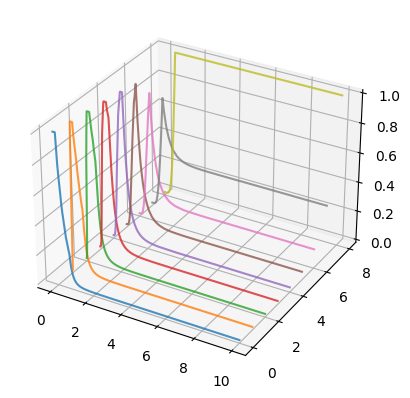

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
y_ticks = list(range(3**N-1))
u = []

# get w_maxes
for ii in set(spl):
    u.append(np.argwhere(spl==ii)[0][0])

res1 = res.y[u, :]
weights = 3**(np.arange(9))
res1 = res1*weights[:, np.newaxis]
res1 = res1/res1.max(axis=0)
    
for ii in set(spl):
    jj = np.argwhere(spl==ii)[0][0]
    print(jj)
    ax.plot(res.t, res1[ii, :], zs=ii, zdir='y', alpha=0.8)

Let's try to visualize a slightly smaller network

In [5]:
# Enable interactive plot
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.colors as colors

<IPython.core.display.Javascript object>


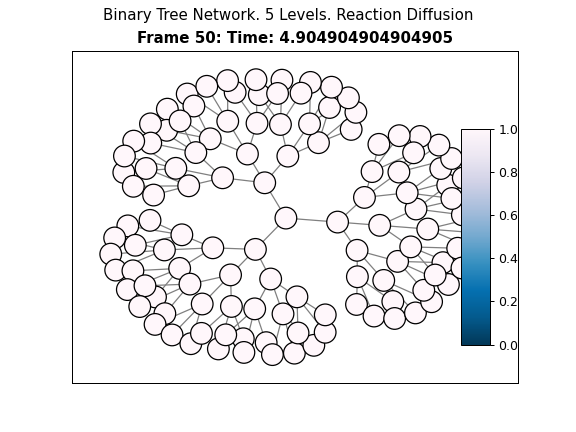

MovieWriter ffmpeg unavailable; using Pillow instead.


In [6]:
from DynaNet import visualize
import importlib
importlib.reload(DynaNet)

# Set exponent of graph size
N = 5

# Note here that 0 is our Root node and will follow special dynamics
G = nx.full_rary_tree(3, (3**N-1)//2)

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 10
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 0.9
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

# Normalize to max population
res1 = res.y/np.max(res.y, axis=0)
    
# Plot our graph dynamically
fig, update = DynaNet.visualize(np.where(res1>0.5, 1, 0), res.t, adj, 10)
fig.suptitle("Binary Tree Network. 5 Levels. Reaction Diffusion")
ani = animation.FuncAnimation(fig, update, 50, repeat=True, blit=True)
ani.save("HoffmanBinaryTree.gif")

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.99978360e-01
  9.99976449e-01 9.99973520e-01]
 [0.00000000e+00 9.47950663e-06 3.82528553e-05 ... 9.99836647e-01
  9.99837076e-01 9.99836634e-01]
 [0.00000000e+00 3.17832380e-06 1.29013496e-05 ... 9.99754587e-01
  9.99757688e-01 9.99760733e-01]
 ...
 [0.00000000e+00 3.17040975e-06 1.28370257e-05 ... 9.99788008e-01
  9.99790767e-01 9.99793622e-01]
 [0.00000000e+00 3.17304280e-06 1.28584067e-05 ... 9.99808470e-01
  9.99810272e-01 9.99811496e-01]
 [0.00000000e+00 2.51486917e-03 5.05386151e-03 ... 9.99544572e-01
  9.99552691e-01 9.99561969e-01]]


<IPython.core.display.Javascript object>


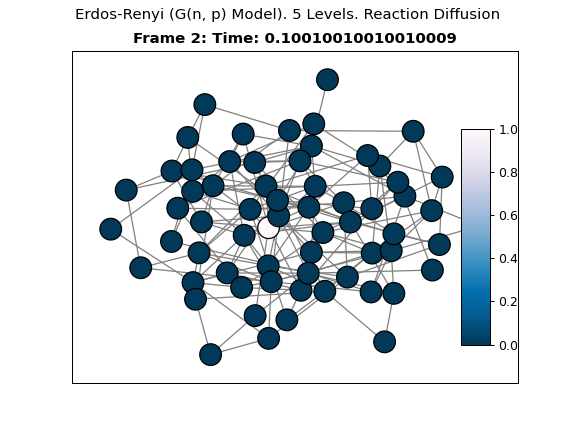

MovieWriter ffmpeg unavailable; using Pillow instead.


In [7]:
from DynaNet import visualize
import importlib
importlib.reload(DynaNet)

# Set exponent of graph size
N = 6

G = nx.erdos_renyi_graph(2**N, 5*2**(-N))

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 0.25
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

# Normalize to max population
res1 = res.y/np.max(res.y, axis=0)

print(res1)
    
# Plot our graph dynamically
fig, update = DynaNet.visualize(np.where(res1>0.5, 1, 0), res.t, adj, 10)
fig.suptitle("Erdos-Renyi (G(n, p) Model). 5 Levels. Reaction Diffusion")
ani = animation.FuncAnimation(fig, update, 50, repeat=True, blit=True)
ani.save("HoffmanERGraph.gif")

# Theoretical Results

Now, lets produce a few more results from Hoffman and look at our linear spreading speeds. By hunting for solutions of the form $e^{\lambda t - \gamma n}$, we recover a set of conditions for linear spreading speed as

$$
F(s, \gamma, \alpha)=
\begin{pmatrix}
\alpha (e^{\gamma} - k - 1 + ke^{-\gamma}) - s\gamma + 1\\
\alpha (e^{\gamma} - ke^{-\gamma}) -s\\
\end{pmatrix}
$$
We get a linear spreading speed at pinched roots of this function

In [8]:
from scipy.optimize import root
import numpy as np
from matplotlib import pyplot as plt

def get_speed_curve(k):

    def speed_curve(alpha):
        def f(x):
            g, s = x[0], x[1]
            return np.array([alpha*(np.exp(g)-k-1+k*np.exp(-g))-s*g+1, alpha*(np.exp(g)-k*np.exp(-g))-s])
        sol = root(f, np.array([1, 1]))
        return sol.x
    
    return speed_curve

C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


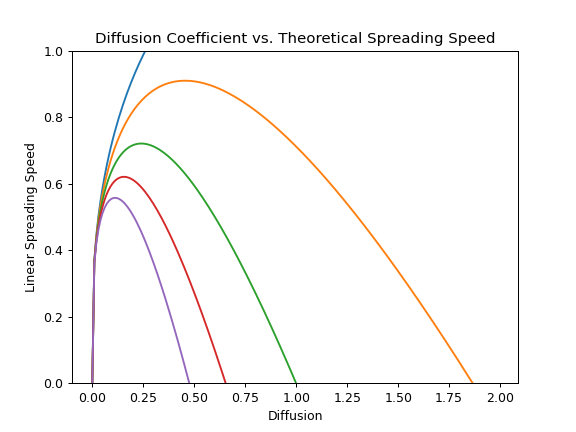

C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\wrmag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # 

In [39]:
for ii in range(2, 7):
    a = np.arange(0, 2, 0.01)
    b = np.zeros(len(a))
    speed_curve = get_speed_curve(ii)
    for ii, alpha in enumerate(a):
        b[ii] = speed_curve(alpha)[1]
    plt.ylim(0, 1)
    plt.title("Diffusion Coefficient vs. Theoretical Spreading Speed")
    plt.xlabel("Diffusion")
    plt.ylabel("Linear Spreading Speed")
    plt.plot(a, b)
plt.savefig("LinearSpreadingSpeed.png")

We Then want to attempt to demonstrate this linear spreading speed. To do so, we will look at the selected spreading speed by tracking the front of the thresholded front. First, we'll look at the 3-ary tree and check it's value at $\alpha = 0.5$ 

In [10]:
# Set exponent of graph size
N = 8

# Note here that 0 is our Root node and will follow special dynamics
G = nx.full_rary_tree(3, (3**N-1)//2)

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 0.5
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 10
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

# Set a thresholding value. This is largely arbitrary, so I will use 0.9
thresh = 0.5

# transform results to their thresholded values
thres_res = res.y > thresh

# find geodesic distances from root node, 0
spl = nx.shortest_path_length(G, source=0)

# Mask by thresholds
dists = np.max(thres_res * np.array([spl[i] for i in range(len(G.nodes))])[:, None], axis=0)

<IPython.core.display.Javascript object>


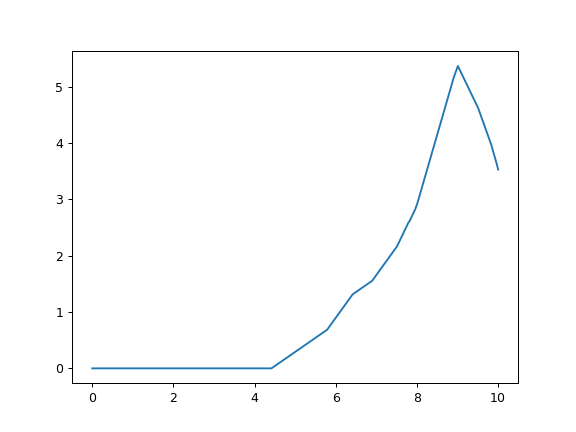

In [14]:
# Do some averaging to guess 'velocity' from discrete nature of Geodesic distances
plt.plot(res.t, np.convolve(np.ones(200), dists, 'same')/200)

<IPython.core.display.Javascript object>


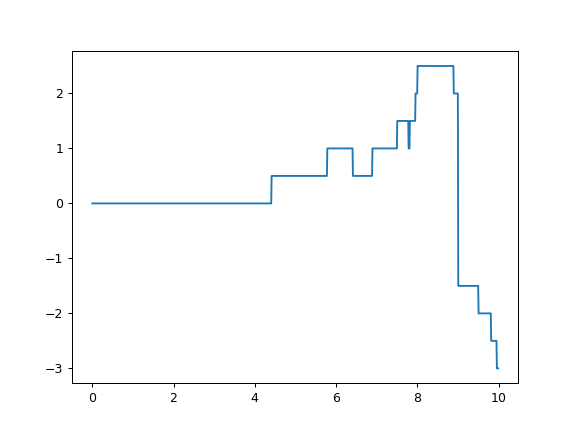

In [15]:
# Do some averaging to guess 'velocity' from discrete nature of Geodesic distances
plt.plot(res.t[:-1], (nt/tf)*np.diff(np.convolve(np.ones(200), dists, 'same'))/200)

Note that there is some slight issue with this. Namely that this code deals with finite sized trees. The results presume that the tree has an infinite number of levels to determine the linear spreading speed. So What we see is a bump in spreading speed at around 9 sec, this is because the front is crashing into the edge of the graph and rebounding, causeing faster spreading near the edge. But for a short time, the spreading speed averates around a reasonable speed, around 0.75 where we should expect close to 0.9. Again, this is a finite size effect. Also, note that the 'negative' speed is a result of the convolution for smoothing.

We can do a similar analysis for a large, sparse, ER graph as follows. We can compare these results by presuming a locally tree-like approximation of a 'k-ary' tree where $k = Np$ is the expected degree of an arbitrary node. E.g, if $N = 10^3, \, p=5*10^{-3}$ then this could reasonably resemble a 5-ary tree locally.

In [50]:
# Set exponent of graph size
N = 4

# Make a large ER graph
G = nx.erdos_renyi_graph(int(10**N), 4*10**(-N))

# Since this is likely disconnected, take the largest component
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Get the relevant Adjacency Matrix
adj = nx.to_numpy_array(G)

# Make our dynamic network
DN = DynaNet.DynaNet(adj_mtx=adj)

# DE parameters
alpha = 0.25
ks = np.array([-alpha for ii in DN.vert])
vs = np.array([0 for ii in DN.vert])

# Initial parameters
f0 = np.zeros(len(DN.vert))
f0[0] = 1
t0 = 0
tf = 20
nt = 1000
t = np.linspace(t0, tf, nt)

# Let'r rip
DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
res = DN.solve_ivp_results

# Set a thresholding value. This is largely arbitrary, so I will use 0.9
thresh = 0.5

# transform results to their thresholded values
thresh_res = res.y > thresh

# find geodesic distances from root node, 0
spl = nx.shortest_path_length(G, source=list(G.nodes)[0])

# get node distances
node_order = list(G.nodes)
node_dists = {ii: spl[node_order[ii]] for ii in range(len(thresh_res[:, 0]))}

# get mean arrival times
un = np.unique(list(spl.values()))
n_l = {ii:len([jj for jj in node_dists.keys() if node_dists[jj]==ii]) for ii in un}
arrival_times = np.argmax(thresh_res, axis=1)*(tf/nt)
t_l = {ii:sum(arrival_times[jj] for jj, kk in node_dists.items() if kk==ii)/n_l[ii] for ii in un}

plt.plot(t_l.keys(), t_l.values())

KeyboardInterrupt: 

So, we can do a breif survey of linear spreading speeds

In [132]:
def get_numeric_spreading(results, thresh):
    # transform results to their thresholded values
    thresh_res = results > thresh

    # find geodesic distances from root node, 0
    spl = nx.shortest_path_length(G, source=list(G.nodes)[0])

    # get node distances
    node_order = list(G.nodes)
    node_dists = {ii: spl[node_order[ii]] for ii in range(len(thresh_res[:, 0]))}

    # get mean arrival times
    un = np.unique(list(spl.values()))
    n_l = {ii:len([jj for jj in node_dists.keys() if node_dists[jj]==ii]) for ii in un}
    arrival_times = np.argmax(thresh_res, axis=1)*(tf/nt)
    t_l = {ii:sum(arrival_times[jj] for jj, kk in node_dists.items() if kk==ii)/n_l[ii] for ii in un}
    
    return t_l

for diff in [.1, .2, .5, 1, 2, 4]:
    rs = np.array([])
    ts = np.array([])
    for jj in range(10):

        # Set exponent of graph size
        N = 3

        # Make a large ER graph
        G = nx.erdos_renyi_graph(int(10**N), 3*10**(-N))

        # Since this is likely disconnected, take the largest component
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

        # Get the relevant Adjacency Matrix
        adj = nx.to_numpy_array(G)

        # Make our dynamic network
        DN = DynaNet.DynaNet(adj_mtx=adj)

        # DE parameters
        alpha = diff
        ks = np.array([-alpha for ii in DN.vert])
        vs = np.array([0 for ii in DN.vert])

        # Initial parameters
        f0 = np.zeros(len(DN.vert))
        f0[0] = 1
        t0 = 0
        tf = 20
        nt = 1000
        t = np.linspace(t0, tf, nt)

        # Let'r rip
        DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
        res = DN.solve_ivp_results

        t_l = get_numeric_spreading(res.y, 0.5)
        k_er = 2

        plt.scatter(t_l.keys(), t_l.values())
        rs = np.append(rs, np.fromiter(t_l.keys(), int)[2:])
        ts = np.append(ts, np.fromiter(t_l.values(), float)[2:])

    regress = linregress(rs.flatten(), ts.flatten())
    plt.plot(np.arange(12), np.arange(12)*regress.slope + regress.intercept)
    plt.title(f"Arrival Time vs Distance. Diff={diff}.")
    plt.xlabel("Geodesic Distance from Origin")
    plt.ylabel("Mean Arrival Time")
    plt.annotate(f"Slope = {regress.slope}", xy=(8, 2.5))
    plt.savefig(f"Mean_Arrival_Time_vs_Dist_ER_diff{diff}_keff2_N{N}.png")
    plt.clf()


We can do the same for population growth rates

<IPython.core.display.Javascript object>


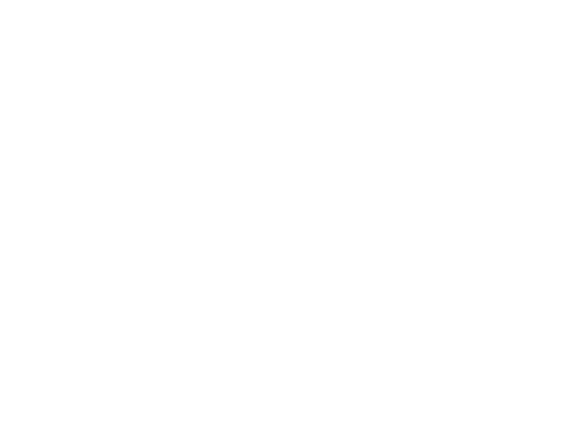

In [131]:
for diff in [0.1, 0.35, 0.6, 0.85]:
    rs = np.array([])
    ts = np.array([])

    # Set exponent of graph size
    N = 3

    # Make a large ER graph
    G = nx.erdos_renyi_graph(int(10**N), 3*10**(-N))

    # Since this is likely disconnected, take the largest component
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()

    # Get the relevant Adjacency Matrix
    adj = nx.to_numpy_array(G)

    # Make our dynamic network
    DN = DynaNet.DynaNet(adj_mtx=adj)

    # DE parameters
    alpha = diff
    ks = np.array([-alpha for ii in DN.vert])
    vs = np.array([0 for ii in DN.vert])

    # Initial parameters
    f0 = np.zeros(len(DN.vert))
    f0[0] = 1
    t0 = 0
    tf = 20
    nt = 1000
    t = np.linspace(t0, tf, nt)

    # Let'r rip
    DN.solve_ivp(KPP, f0, t0, tf, nt, ks, vs)
    res = DN.solve_ivp_results

    k_er = 2

    plt.semilogy(res.t, res.y.sum(axis=0))
plt.title(f"Total Population Over Time. Diff={diff}.")
plt.xlabel("Time")
plt.ylabel("Total Population (Log-scaled)")
plt.savefig(f"Total_Population_over_Time_ER_diff0.1-0.3-0.6-0.8_keff2_N{N}.png")